# Workflow Example with CCLM input convertor
Here we illustrate a complete workflow example using the CCLM convertor

## Imports

In [1]:
import xarray as xr

import valenspy as vp #The Valenspy package
from valenspy.inputconverter_functions import CCLM_to_CF


## 1. Load the CCLM data using the input manager

In [2]:
variable = 'tas'

In [3]:
manager = vp.InputManager(machine='hortense')

ds = manager.load_data("CCLM", ["tas"], freq="daily", path_identifiers=["EUR11_NU_TT_EC_TSO", "mean"])
ds

File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/T_2M/daily/T_2M_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']


<xarray.Dataset> Size: 97MB
Dimensions:       (time: 123, bnds: 2, rlat: 434, rlon: 446)
Coordinates:
  * time          (time) datetime64[ns] 984B 1995-05-01T11:30:00 ... 1995-08-...
    lon           (rlat, rlon) float32 774kB dask.array<chunksize=(434, 446), meta=np.ndarray>
    lat           (rlat, rlon) float32 774kB dask.array<chunksize=(434, 446), meta=np.ndarray>
  * rlon          (rlon) float32 2kB -29.58 -29.48 -29.36 ... 19.15 19.25 19.36
  * rlat          (rlat) float32 2kB -24.58 -24.48 -24.36 ... 22.83 22.93 23.05
    height_2m     float32 4B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(123, 2), meta=np.ndarray>
    rotated_pole  |S1 1B ...
    tas           (time, rlat, rlon) float32 95MB dask.array<chunksize=(123, 434, 446), meta=np.ndarray>
Attributes: (12/18)
    CDI:               Climate Data Interface version 2.4.0 (https://mpimet.m...
    Conventions:       CF-1.4
    source:            cosmo6.00_clm2, int2lm3.0_clm1
    institution:       KU Leuven, Leuven, BELGIUM
    title:             EUR11_NU_TT_EC (dx = 12.5km) using COSMO-CLM6
    project_id:        CORDEXbe2
    ...                ...
    history:           Mon Jul 29 11:25:05 2024: cdo mergetime T_2M_daymean_1...
    frequency:         day
    CDO:               Climate Data Operators version 2.4.0 (https://mpimet.m...
    freq:              daily
    path_identifiers:  ['EUR11_NU_TT_EC_TSO', 'mean']
    dataset:           CCLM

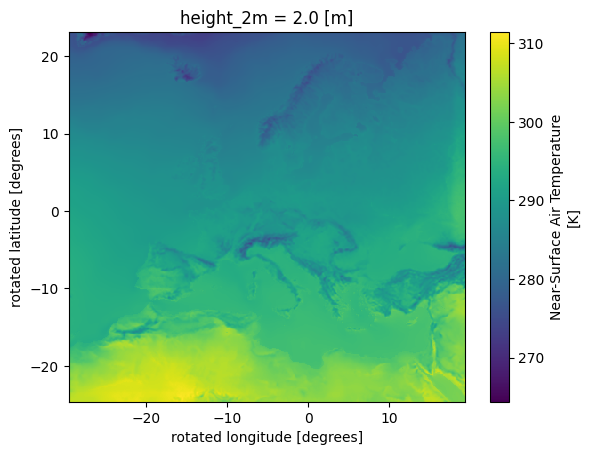

In [4]:
ds['tas'].mean('time').plot()

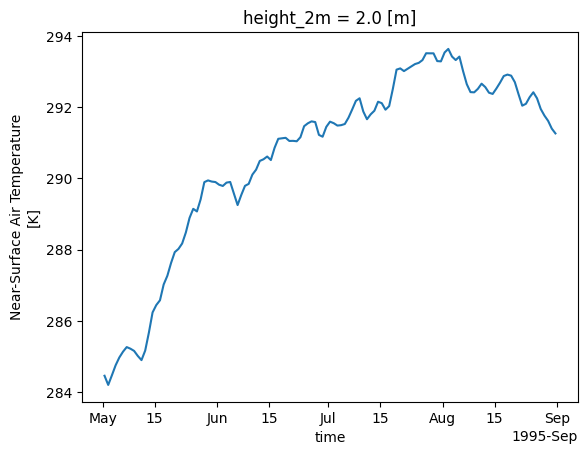

In [5]:
ds['tas'].mean(dim=('rlat','rlon')).plot()